# **Inferencing with Bayesian Network in Python**
In this demonstration, we’ll use Bayesian Networks to solve the well-known Monty Hall Problem. Let me explain the Monty Hall problem to those of you who are unfamiliar with it:

This problem entails a competition in which a contestant must choose one of three doors, one of which conceals a price. The show’s host (Monty) unlocks an empty door and asks the contestant if he wants to swap to the other door after the contestant has chosen one.

The decision is whether to keep the current door or replace it with a new one. It is preferable to enter by the other door because the price is more likely to be higher. To come out from this ambiguity let’s model this with a Bayesian network.



# Implementation

For this demonstration, we are using a python-based package pgmpy is a Bayesian Networks implementation written entirely in Python with a focus on modularity and flexibility. Structure Learning, Parameter Estimation, Approximate (Sampling-Based) and Exact inference, and Causal Inference are all available as implementations.

In [ ]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.1 MB/s eta 0:00:00


from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt

The BayesianModel can be initialized by passing a list of edges in the model structure. In this case, there are 4 edges in the model: Guest--> Host, Price-->host

In [ ]:
# Defining Bayesian Structure
model = BayesianNetwork([('Guest', 'Host'), ('Price', 'Host')])

**Step 2: Define the CPDs(Conditional Probability Distribution)**

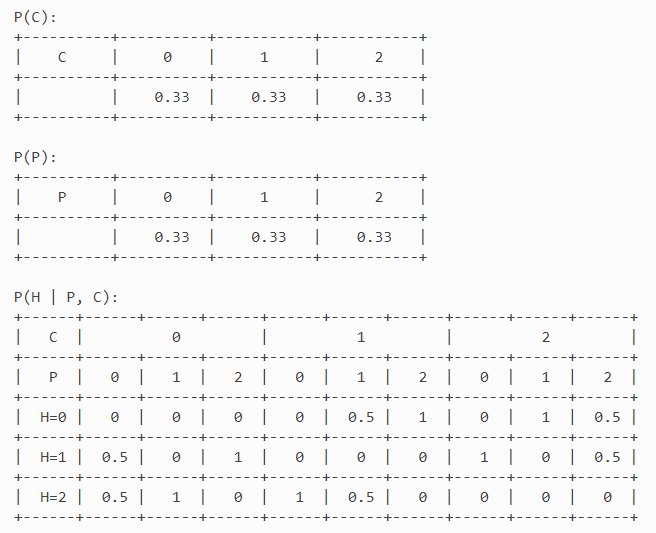

In [ ]:
# Defining the CPDs:
cpd_guest = TabularCPD('Guest', 3, [[0.33], [0.33], [0.33]])
cpd_price = TabularCPD('Price', 3, [[0.33], [0.33], [0.33]])
cpd_host = TabularCPD('Host', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
                            [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['Guest', 'Price'], evidence_card=[3, 3])

**Step 3: Add the CPDs to the model.**

After defining the model parameters, we can now add them to the model using add_cpds method. The check_model method can also be used to verify if the CPDs are correctly defined for the model structure.

In [ ]:
# Associating the CPDs with the network structure.
model.add_cpds(cpd_guest, cpd_price, cpd_host)

Now we will check the model structure and associated conditional probability distribution by the argument get_cpds() will return True if every this is fine else through an error msg.

In [ ]:
model.check_model()

True

Now let’s infer the network, if we want to check at the next step which door will the host open now. For that, we need access to the posterior probability from the network and while accessing we need to pass the evidence to the function. Evidence is needed to be given when we are evaluating posterior probability, here in our task evidence is nothing but which door is Guest selected and where is the Price.

In [ ]:
# Infering the posterior probability
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(['Host'], evidence={'Guest': 2, 'Price': 2})
print(posterior_p)

+---------+-------------+
| Host    |   phi(Host) |
+=========+=============+
| Host(0) |      0.5000 |
+---------+-------------+
| Host(1) |      0.5000 |
+---------+-------------+
| Host(2) |      0.0000 |
+---------+-------------+


In [ ]:
# Infering the posterior probability
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(['Host'], evidence={'Guest': 1, 'Price': 2})
print(posterior_p)

+---------+-------------+
| Host    |   phi(Host) |
+=========+=============+
| Host(0) |      1.0000 |
+---------+-------------+
| Host(1) |      0.0000 |
+---------+-------------+
| Host(2) |      0.0000 |
+---------+-------------+


The probability distribution of the Host is clearly satisfying the theme of the contest. In the reality also, in this situation host definitely not going to open the second door he will open either of the first two and that’s what the above simulation tells.

Now, let’s plot our above model. This can be done with the help of Network and Pylab. NetworkX is a Python-based software package for constructing, altering, and researching the structure, dynamics, and function of complex networks. PyLab is a procedural interface to the object-oriented charting toolkit Matplotlib, and it is used to examine large complex networks represented as graphs with nodes and edges.

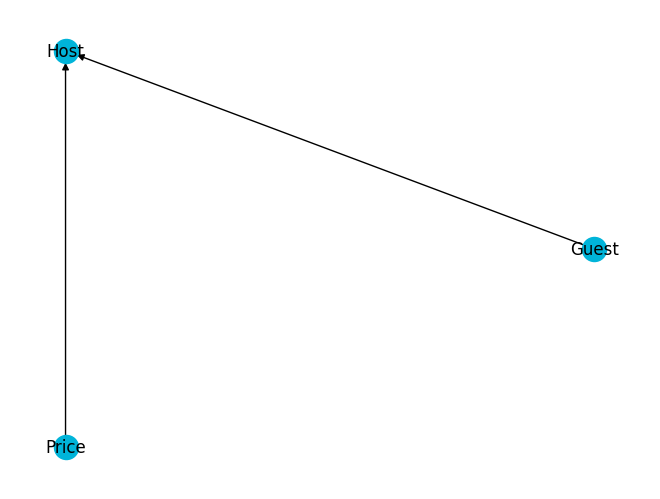

In [ ]:
pos = nx.circular_layout(model)
nx.draw(model, node_color='#00b4d9', pos=pos, with_labels=True)
plt.show()
plt.savefig('model.png')
plt.close()

[Reference1](https://analyticsindiamag.com/a-guide-to-inferencing-with-bayesian-network-in-python/)


[Reference2](https://pgmpy.org/examples/Monty%20Hall%20Problem.html)